# k近邻算法

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.normal?


In [4]:
raw_data_x = np.random.normal(2.0, 2.5, (2, 10))
raw_data_x

array([[ 0.95655304,  0.4565384 ,  2.77582904,  5.9319639 ,  2.66877351,
         2.77177432, -1.46238984,  2.84920029,  0.92020971,  3.56912793],
       [ 3.60332556,  1.07715782,  2.43799949, -2.02320937,  0.99627722,
         2.91221853, -1.08438128,  3.12888369, -0.70179787,  3.55223191]])

In [6]:
raw_data_x = np.random.normal(5.0, 5.5, (10,2))
raw_data_x

array([[ 7.80420965, -2.49331022],
       [-1.84723891,  0.10934694],
       [ 0.70809437,  2.09585716],
       [ 2.3406145 , -0.93488603],
       [ 1.56255093,  2.02388012],
       [ 5.86910927, -2.6650869 ],
       [ 4.60684472,  2.80822872],
       [-0.97018092,  2.99315471],
       [-2.63392173,  2.56574324],
       [ 3.99670448,  9.98993915]])

In [20]:
x = raw_data_x[:,:1].reshape([10,])
x

array([ 7.80420965, -1.84723891,  0.70809437,  2.3406145 ,  1.56255093,
        5.86910927,  4.60684472, -0.97018092, -2.63392173,  3.99670448])

In [34]:
x,y = np.hsplit(raw_data_x, 2)
x

array([[ 7.80420965],
       [-1.84723891],
       [ 0.70809437],
       [ 2.3406145 ],
       [ 1.56255093],
       [ 5.86910927],
       [ 4.60684472],
       [-0.97018092],
       [-2.63392173],
       [ 3.99670448]])

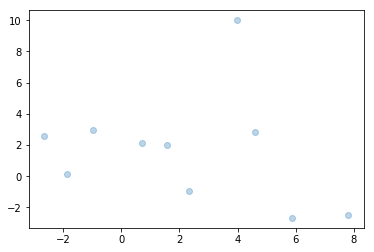

In [35]:
plt.scatter(x, y, alpha=0.3)
plt.show()

In [47]:
raw_data_y = ((x + y >5)+0)[:, 0]
raw_data_y

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [39]:
x_train = raw_data_x
x_train

array([[ 7.80420965, -2.49331022],
       [-1.84723891,  0.10934694],
       [ 0.70809437,  2.09585716],
       [ 2.3406145 , -0.93488603],
       [ 1.56255093,  2.02388012],
       [ 5.86910927, -2.6650869 ],
       [ 4.60684472,  2.80822872],
       [-0.97018092,  2.99315471],
       [-2.63392173,  2.56574324],
       [ 3.99670448,  9.98993915]])

In [48]:
y_train = raw_data_y
y_train

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [52]:
x_train[y_train==0, 0]

array([-1.84723891,  0.70809437,  2.3406145 ,  1.56255093,  5.86910927,
       -0.97018092, -2.63392173])

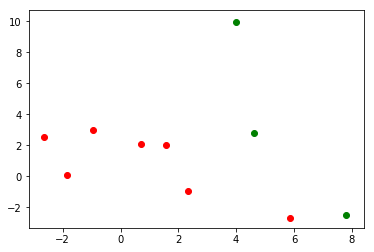

In [53]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='g')
plt.show()

In [54]:
x = np.array([8,6])

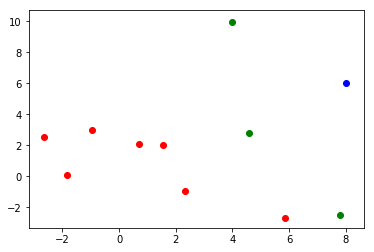

In [56]:
x = np.array([8,6])
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='g')
plt.scatter(x[0], x[1], c='b')
plt.show()

In [58]:
x_train


array([[ 7.80420965, -2.49331022],
       [-1.84723891,  0.10934694],
       [ 0.70809437,  2.09585716],
       [ 2.3406145 , -0.93488603],
       [ 1.56255093,  2.02388012],
       [ 5.86910927, -2.6650869 ],
       [ 4.60684472,  2.80822872],
       [-0.97018092,  2.99315471],
       [-2.63392173,  2.56574324],
       [ 3.99670448,  9.98993915]])

In [59]:
x_train-x


array([[ -0.19579035,  -8.49331022],
       [ -9.84723891,  -5.89065306],
       [ -7.29190563,  -3.90414284],
       [ -5.6593855 ,  -6.93488603],
       [ -6.43744907,  -3.97611988],
       [ -2.13089073,  -8.6650869 ],
       [ -3.39315528,  -3.19177128],
       [ -8.97018092,  -3.00684529],
       [-10.63392173,  -3.43425676],
       [ -4.00329552,   3.98993915]])

In [62]:
t = (x_train-x)**2
t

array([[3.83338619e-02, 7.21363184e+01],
       [9.69681141e+01, 3.46997935e+01],
       [5.31718878e+01, 1.52423313e+01],
       [3.20286442e+01, 4.80926442e+01],
       [4.14407506e+01, 1.58095293e+01],
       [4.54069532e+00, 7.50837310e+01],
       [1.15135027e+01, 1.01874039e+01],
       [8.04641457e+01, 9.04111860e+00],
       [1.13080291e+02, 1.17941195e+01],
       [1.60263751e+01, 1.59196144e+01]])

In [63]:
from math import sqrt

In [72]:
t[:,0]+t[:,1]

array([ 72.17465228, 131.66790756,  68.41421906,  80.12128842,
        57.25027988,  79.62442635,  21.70090665,  89.50526428,
       124.87441088,  31.94598949])

In [73]:
np.sum(t, axis=1)

array([ 72.17465228, 131.66790756,  68.41421906,  80.12128842,
        57.25027988,  79.62442635,  21.70090665,  89.50526428,
       124.87441088,  31.94598949])

In [76]:
distince = np.sqrt(np.sum(t, axis=1))
distince

array([ 8.49556662, 11.47466372,  8.27128884,  8.95104957,  7.56639147,
        8.92325201,  4.65842319,  9.46072219, 11.17472196,  5.65207833])

In [79]:
nearest = np.argsort(distince)
nearest

array([6, 9, 4, 2, 0, 5, 3, 7, 8, 1], dtype=int64)

In [80]:
k = 4

In [83]:
k = 5
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 0, 0, 1]

In [84]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({1: 3, 0: 2})

In [100]:
result = votes.most_common(1)[0][0]
result

1

In [106]:
[ ("label:"+i+",res:" + (votes[i]/k)) for i in votes.keys]

TypeError: 'builtin_function_or_method' object is not iterable

In [121]:
print (str(votes[0]) + "key")

2key


In [126]:
for key in votes.keys():
#    print("key:" + str(votes[key]))
    print ("key:" + str(key) + ",result:" + str(votes[key]/5))

key:1,result:0.6
key:0,result:0.4
